In [1]:
#Импортируем необходимые библиотеки
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
#from copy import deepcopy
#Новые библиотеки с выделенными функциями
import mv_tools as mvt
import solver
warnings.filterwarnings('ignore')

Датасет взят из следующего источника: https://www.openml.org/search?type=data&sort=runs&status=active&order=desc&qualities.NumberOfClasses=%3D_2&qualities.NumberOfFeatures=lte_10&qualities.NumberOfInstances=lte_1000&id=1005,
также может быть найден (в ином формате) по следующей ссылке: https://archive.ics.uci.edu/dataset/42/glass+identification

# Считываем датасет из файла, отдельно метки, отдельно признаки

In [2]:
features = []
with open('Datasets/glass.arff','r') as f1:
    for line in f1:
        if line[0].isdigit():
            if line[-1]=='\n':
                data = line[:-1].split(',')
            else:
                data = line.split(',')
            features.append(data)
            for i in range(len(features[-1])):
                try:
                    features[-1][i]=float(features[-1][i])
                except:
                    pass
                    
F=pd.DataFrame(features, columns=['RI','NA','Mg','Al','Si','K','Ca','Ba','Fe','labels'])  

In [3]:
F

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,N
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,N
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,N
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,N
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,P
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,N
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,P
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,P
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,P


In [4]:
F1=F.drop(columns=['labels'])

In [5]:
F1.corr().round(2)

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14
NA,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00


In [6]:
np.linalg.det(F1.corr().round(2).values)

0.0004827752432423349

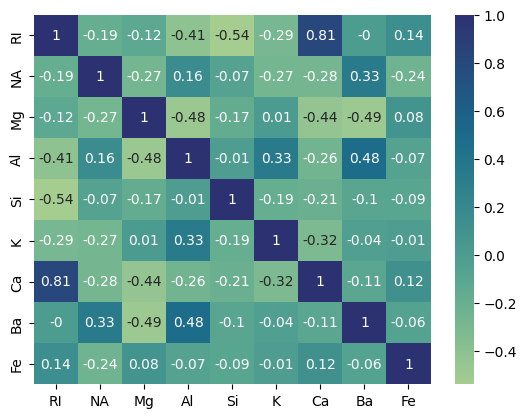

In [7]:
dataplot = sns.heatmap(F1.corr().round(2), cmap="crest", annot=True)

# Тест на нормальное распределение признаков

In [8]:
for col in F1.columns:
    print(stats.shapiro(F1[col]))

ShapiroResult(statistic=0.8675722824224852, pvalue=1.0766712928974077e-12)
ShapiroResult(statistic=0.945762306985968, pvalue=3.4655426922939914e-07)
ShapiroResult(statistic=0.6993364173009177, pvalue=2.390921270062536e-19)
ShapiroResult(statistic=0.9434125977963359, pvalue=2.083156241596038e-07)
ShapiroResult(statistic=0.9196619139626916, pvalue=2.175031659381859e-09)
ShapiroResult(statistic=0.44161768779031496, pvalue=2.172188035682615e-25)
ShapiroResult(statistic=0.793867908360201, pvalue=4.286584041376024e-16)
ShapiroResult(statistic=0.4085650688572169, pvalue=5.383301973907288e-26)
ShapiroResult(statistic=0.6532001093351217, pvalue=1.1566680199469558e-20)


In [9]:
F_np=F1.values

In [10]:
log_F = np.log(F_np+np.full(F_np.shape, 1e-6))

In [11]:
log_F

array([[  0.41734822,   2.54866369,   1.25276325, ...,   2.17133692,
        -13.81551056, -13.81551056],
       [  0.41635955,   2.49815196,   1.25846127, ...,   2.14358948,
        -13.81551056, -13.81551056],
       [  0.41734822,   2.58097419,   1.24703258, ...,   2.13179689,
        -13.81551056, -13.81551056],
       ...,
       [  0.4161617 ,   2.63332673,   1.25846127, ...,   2.0719134 ,
        -13.81551056,  -1.96610571],
       [  0.41666285,   2.53923707,   1.05779064, ...,   2.14476112,
        -13.81551056, -13.81551056],
       [  0.41773683,   2.6454654 ,   0.783902  , ...,   2.23216274,
        -13.81551056, -13.81551056]])

In [12]:
for i in range(len(log_F[0])):
    print(stats.shapiro(log_F[:,i]))

ShapiroResult(statistic=0.8686667828674778, pvalue=1.234798136482314e-12)
ShapiroResult(statistic=0.9500171432905523, pvalue=8.999987755403209e-07)
ShapiroResult(statistic=0.509504463760901, pvalue=4.728342272449703e-24)
ShapiroResult(statistic=0.9427557974066859, pvalue=1.810823766350035e-07)
ShapiroResult(statistic=0.9168881205723496, pvalue=1.3516776555211859e-09)
ShapiroResult(statistic=0.5490436690607463, pvalue=3.322791178791935e-23)
ShapiroResult(statistic=0.8648062221124744, pvalue=7.641256310836631e-13)
ShapiroResult(statistic=0.47884894798056776, pvalue=1.131994804257362e-24)
ShapiroResult(statistic=0.6144322516821475, pvalue=1.1392992560383952e-21)


In [13]:
F_labels = list(F['labels'])
for i in range(len(F_labels)):
    if F_labels[i]=="N":
        F_labels[i] = 0
    if F_labels[i]=="P":
        F_labels[i] = 1

In [14]:
print(f"Число разных классов для датасета: {len(set(F_labels))}")

Число разных классов для датасета: 2


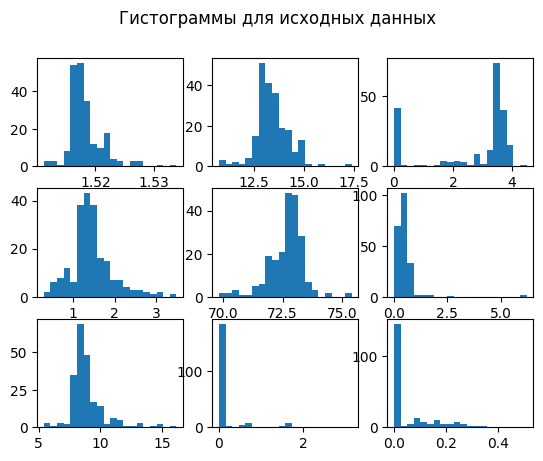

In [15]:
fig, axs = plt.subplots(3, 3)
plt.suptitle("Гистограммы для исходных данных")
for i, ax in enumerate(axs.flat):
    ax.hist(F_np[:,i], bins=20)

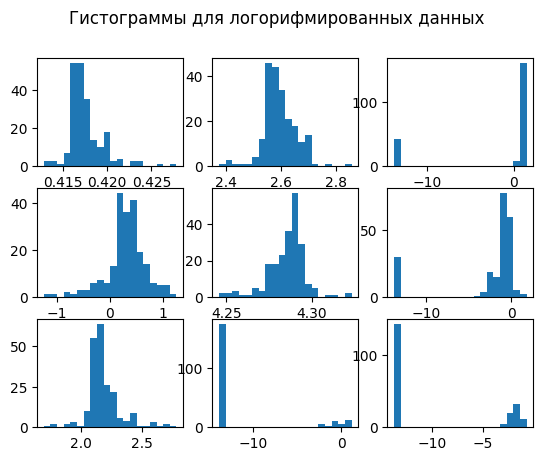

In [16]:
fig, axs = plt.subplots(3, 3)
plt.suptitle("Гистограммы для логорифмированных данных")
for i, ax in enumerate(axs.flat):
    ax.hist(log_F[:,i], bins=20)

In [17]:
pima = pd.read_csv("Datasets/pima-indians-diabetes.data.csv", header=None)

In [18]:
pima

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
pima.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
pima[[1,2,3,4,5]] =  pima[[1,2,3,4,5]].replace(0, np.NaN)

In [21]:
pima

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [22]:
labels = pima[8]

In [23]:
pima.columns = ['Number of times pregnant',
'Plasma glucose concentration',
'Diastolic blood pressure',
'Triceps skinfold thickness',
'2-Hour serum insulin',
'Body mass index',
'Diabetes pedigree function',
'Age',
'Class variable (0 or 1)']

In [24]:
F1=pima.drop(columns=['Class variable (0 or 1)'])

In [25]:
F1.corr().round(2)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
Number of times pregnant,1.00,0.13,0.21,0.10,0.08,0.02,-0.03,0.54
Plasma glucose concentration,0.13,1.00,0.22,0.23,0.58,0.23,0.14,0.27
Diastolic blood pressure,0.21,0.22,1.00,0.23,0.10,0.29,-0.00,0.33
Triceps skinfold thickness,0.10,0.23,0.23,1.00,0.18,0.65,0.12,0.17
2-Hour serum insulin,0.08,0.58,0.10,0.18,1.00,0.23,0.13,0.22
Body mass index,0.02,0.23,0.29,0.65,0.23,1.00,0.16,0.03
Diabetes pedigree function,-0.03,0.14,-0.00,0.12,0.13,0.16,1.00,0.03
Age,0.54,0.27,0.33,0.17,0.22,0.03,0.03,1.00


In [26]:
pima1 = F1.values

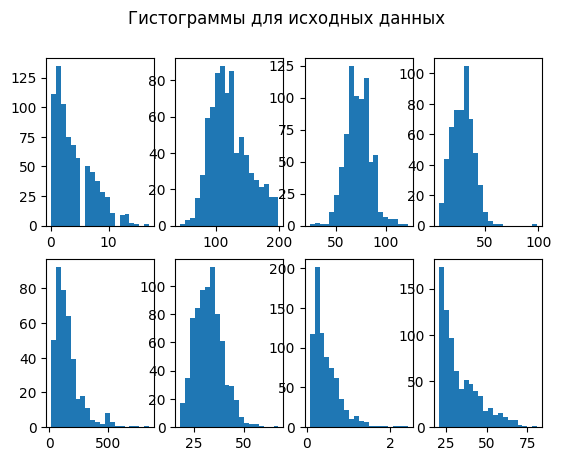

In [31]:
fig, axs = plt.subplots(2, 4)
plt.suptitle("Гистограммы для исходных данных")
for i, ax in enumerate(axs.flat):
    filtered_arr = np.array(list(filter(lambda v: v==v, pima1[:,i])))
    ax.hist(filtered_arr, bins=20)


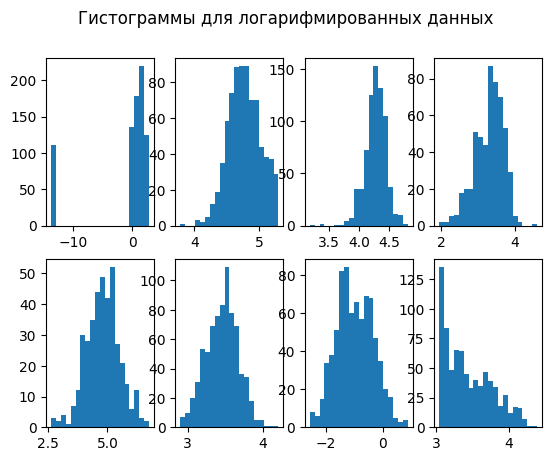

In [35]:
fig, axs = plt.subplots(2, 4)
plt.suptitle("Гистограммы для логарифмированных данных")
for i, ax in enumerate(axs.flat):
    filtered_arr = np.array(list(filter(lambda v: v==v, pima1[:,i])))
    filtered_arr = np.log(filtered_arr+np.full(filtered_arr.shape, 1e-6))
    ax.hist(filtered_arr, bins=20)